## Importing the packages

In [2]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Importing the News data

In [3]:
news_data = pd.read_csv('./dataset/news.tsv', header=None, sep='\t')
news_data.columns = ["News_ID",
                    "Category",
                    "SubCategory",
                    "Title",
                    "Abstract",
                    "URL",
                    "Title Entities",
                    "Abstract Entities"] 
news_data.head()

,News_ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [4]:
c = news_data[['Category','SubCategory']].value_counts()

## Visualizing the data

In [5]:
index = list()
for i in c.index:
    index.append(np.array(i))
index = np.array(index)
# print(index)

In [12]:
df = pd.DataFrame(columns=['Category','Sub Category', 'Values'])
df['Category'] = index[:,0]
df['Sub Category'] = index[:,1]
df['Values'] = c.values
print(df)

    Category                     Sub Category  Values
0       news                           newsus    6564
1     sports                     football_nfl    5420
2       news                     newspolitics    2826
3       news                        newscrime    2254
4    weather                weathertopstories    2047
..       ...                              ...     ...
278  finance               finance-home-loans       1
279  finance  finance-homesandpropertysection       1
280     news                     newsnational       1
281     news             narendramodi_opinion       1
282  finance          finance-insidetheticker       1

[283 rows x 3 columns]


### Category and Sub Category distribution

In [7]:
px.bar(data_frame=df, x='Category', y='Values', color='Sub Category')

In [8]:
px.scatter_3d(data_frame=df, x='Category', y='Sub Category', z='Values', color='Sub Category')  # visualization not so clear

### Title length distribution

In [9]:
title_length = list()
for i in news_data['Title']:
    title_length.append(len(i))
px.histogram(title_length, color=news_data['Category'])

### Word cloud - What are the most popular words in the titles of a particular Category?
- Category : news

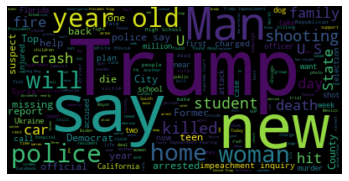

In [10]:
text = ''
for i in news_data[news_data['Category'] == 'news']['Title']:
    text = text + i + ' '

# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Importing the behaviors data

In [59]:
behaviors_data = pd.read_csv('./dataset/behaviors.tsv', header=None, sep='\t')
behaviors_data.columns = ["Impression ID",
                    "User ID",
                    "Time",
                    "History",
                    "Impressions"] 
behaviors_data.head()

,Impression ID,User ID,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


In [60]:
df_behavior = pd.DataFrame(behaviors_data)
# sort by time
df_behavior = df_behavior.sort_values(by='Time', ascending=True).reset_index(drop=True)
new = df_behavior['Time'].str.split(' ', expand=True)
df_behavior['Date'] = new[0]
df_behavior['time'] = new[1]
df_behavior['a/p'] = new[2]
del df_behavior['Time']
df_behavior['Time'] = df_behavior['time'] + df_behavior['a/p']
del df_behavior['time']
del df_behavior['a/p']
print(df_behavior)

        Impression ID User ID  \
0               64760  U22697   
1               55848  U50864   
2               32721  U69430   
3              151538  U61562   
4               37838  U31618   
...               ...     ...   
156960          59877  U74539   
156961            637  U33571   
156962         127951  U55630   
156963          90279  U51101   
156964          52862  U19277   

                                                  History  \
0       N32060 N10059 N43265 N29021 N44188 N6959 N1020...   
1       N4978 N57537 N15122 N9226 N37003 N16715 N36530...   
2       N55189 N47474 N16233 N4020 N770 N51706 N54698 ...   
3       N29177 N16215 N35009 N55189 N12922 N18127 N649...   
4          N55189 N10059 N60206 N51706 N47464 N16715 N306   
...                                                   ...   
156960  N13760 N31057 N12260 N24298 N41674 N34105 N600...   
156961  N55829 N30342 N56253 N58264 N26504 N54012 N373...   
156962  N22500 N39556 N60303 N54006 N38000 N42363 N444